## Implement  Linear Regression using SGD

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [7]:
import numpy as np
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

In [8]:
import sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 14)
(152, 14)
(354,)
(152,)


C:\Users\abc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
W =np.array([0, 0, 0,0,0,0,0,0,0,0,0,0,0,0]) # Initial W's vector

In [10]:
len(W)

14

In [11]:
def cost_function(X_train, Y_train, W):
    m = len(Y_train)
    J = np.sum((X_train.dot(W) - Y_train) ** 2)/(2 * m)
    return J

In [12]:
inital_cost = cost_function(X_train, Y_train, W)
print("Initial cost :",inital_cost) 

Initial cost : 301.06069209039543


####  As initial cost is high we will try to minimize it using SGD

In [13]:
alpha = 0.01

In [14]:
def gradient_descent(X_train, Y_train, W, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y_train)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X_train.dot(W)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y_train
        # Gradient Calculation
        gradient = X_train.T.dot(loss) / m
        # Changing Values of B using Gradient
        W = W - alpha * gradient
        
        # Changing Values of alpha
        #alpha=alpha/2
        # New Cost Value
        cost = cost_function(X_train, Y_train, W)
        cost_history[iteration] = cost
        
    return W, cost_history

In [15]:
# 10000 Iterations
newW, cost_history = gradient_descent(X_train, Y_train, W, alpha, 10000)

# New Values of W
print("Weight Vector :",newW)



Weight Vector : [ 22.45512049  -1.02917017   1.03469858   0.08017056   0.63781549
  -1.88326336   2.70199514  -0.27737602  -3.1555505    2.09790486
  -1.86020574  -2.20372283   0.63405434  -3.48208999]


In [33]:
h = X_train[0].dot(newW)
        # Difference b/w Hypothesis and Actual Y
intercept = Y_train[0] - h
print("Intercept :",intercept)

Intercept : 19.4303397822


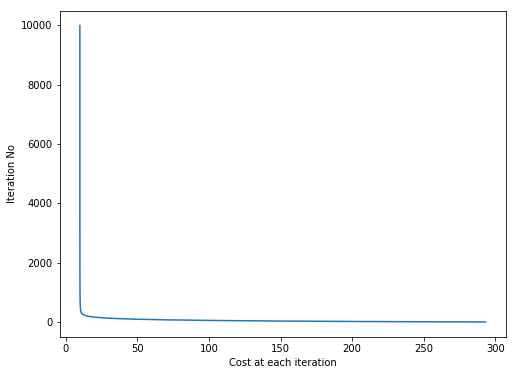

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(cost_history, range(10000))


plt.xlabel('Cost at each iteration')
plt.ylabel('Iteration No')
plt.show()

### Model Performance - R2 Score

In [17]:
def r2_score(Y_test, Y_pred):
    mean_y = np.mean(Y_test)
    ss_tot = sum((Y_test - mean_y) ** 2)
    ss_res = sum((Y_test - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [18]:
Y_pred = X_test.dot(newW)

In [19]:
print("R2 Score :",r2_score(Y_test, Y_pred))

R2 Score : 0.673513663462


### Plot between y_test Vs y_pred

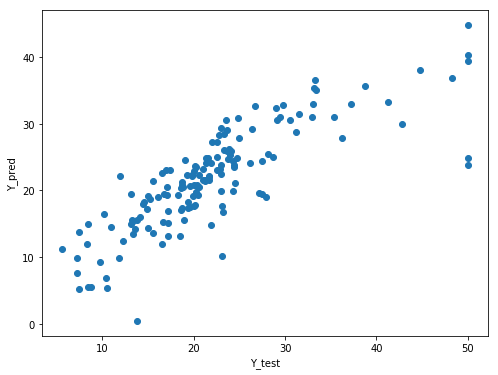

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

### Root Mean Squared Error

In [21]:
MSE=np.sum((Y_test-Y_pred)**2)/len(Y_test)
print(np.sqrt(MSE))

5.21392832632


##   Implement Linear Regression using scikit-learn Approach

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

In [24]:
print("Weight Vector :", lm.coef_)

Weight Vector : [ 0.         -1.0293798   1.03503607  0.08129189  0.63764345 -1.88358598
  2.70176932 -0.27712478 -3.15549965  2.1007931  -1.8633877  -2.20384918
  0.63412121 -3.48218173]


In [30]:
print("Intercept :",lm.intercept_)

Intercept : 22.4550574809


### Plot between y_test Vs y_pred

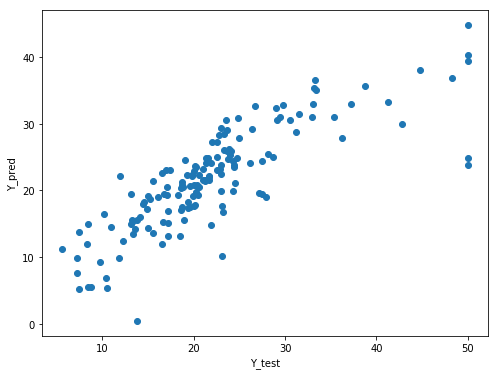

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [26]:
from sklearn.metrics import r2_score
print("R2 Score :",r2_score(Y_test,Y_pred))

R2 Score : 0.673528086535


### Root Mean Squared Error

In [27]:
MSE=np.sum((Y_test-Y_pred)**2)/len(Y_test)
print(np.sqrt(MSE))

5.2138131581
